# Разведывательный анализ данных

Есть один из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. 

Чтобы определиться с параметрами будущей модели, необходимо провести разведывательный анализ данных и составить отчёт по его результатам. 

## Первичный анализ данных и оценка уникальных значений

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

st = pd.read_csv('stud_math.csv')

In [2]:
st.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Итого 30 столбцов:
- school — аббревиатура школы, в которой учится ученик
- sex — пол ученика ('F' - женский, 'M' - мужской)
- age — возраст ученика (от 15 до 22)
- address — тип адреса ученика ('U' - городской, 'R' - за городом)
- famsize — размер семьи('LE3' <= 3, 'GT3' >3)
- Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
- Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
- guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
- traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
- studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
- failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
- schoolsup — дополнительная образовательная поддержка (yes или no)
- famsup — семейная образовательная поддержка (yes или no)
- paid — дополнительные платные занятия по математике (yes или no)
- activities — дополнительные внеучебные занятия (yes или no)
- nursery — посещал детский сад (yes или no)
- studytime, granular - неизвестно, что за столбец, предстоит выяснить, нужен он для построения модели или нет
- higher — хочет получить высшее образование (yes или no)
- internet — наличие интернета дома (yes или no)
- romantic — в романтических отношениях (yes или no)
- famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
- freetime — свободное время после школы (от 1 - очень мало до 5 - очень много)
- goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
- health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
- absences — количество пропущенных занятий
- score — баллы по госэкзамену по математике


Судя по описанию столбцов уникальных значений в них должно быть не так много (исключая столбцы 'absences' и 'score'). Соответсвенно, на уникальные значения можно их проанализировать одной функцией.

In [4]:
col = st.columns.to_list()
del col[28:30]  # исключаем столбцы 'absences' и 'score'
print(col)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']


In [5]:
def get_value_counts(column):
    df = pd.DataFrame(st.loc[:, column].value_counts(dropna=False))
    display(df)

In [6]:
for c in col:
    get_value_counts(c)

,school
GP,349
MS,46


,sex
F,208
M,187


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


,address
U,295
R,83
NaN,17


,famsize
GT3,261
LE3,107
NaN,27


,Pstatus
T,314
NaN,45
A,36


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
NaN,19


,Fjob
other,197
services,102
NaN,36
teacher,29
at_home,16
health,15


,reason
course,137
home,104
reputation,103
other,34
NaN,17


,guardian
mother,250
father,86
NaN,31
other,28


,traveltime
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


,studytime
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7


,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


,schoolsup
no,335
yes,51
NaN,9


,famsup
yes,219
no,137
NaN,39


,paid
no,200
yes,155
NaN,40


,activities
yes,195
no,186
NaN,14


,nursery
yes,300
no,79
NaN,16


,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27
NaN,7


,higher
yes,356
NaN,20
no,19


,internet
yes,305
no,56
NaN,34


,romantic
no,240
yes,124
NaN,31


,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
NaN,11


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
NaN,8


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
NaN,15


Как видим, в столбце 'Fedu' есть значение 40.0, которое не соответствует описанию столбца. Скорее всего тут закралась ошибка, и вместо 40.0 должно быть значение 4.0. Но так как нам это доподлинно не известно и такое значение только одно, то имеет смысл убрать эту строчку из данных.

In [7]:
st = st[st.Fedu != 40]

Так же в столбце 'famrel' есть значение -1, которое тоже не соответствует описанию столбца. Уберем эту строку из рассмотрения.

In [8]:
st = st[st.famrel != -1]

Покажем количество уникальных переменных в столбцах с типом данных 'object':

In [9]:
st.select_dtypes(include='object').nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

## Анализ распределения признака для числовых переменных 

Рассмотрим столбец 'absences':

count    381.000000
mean       7.270341
std       23.523737
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

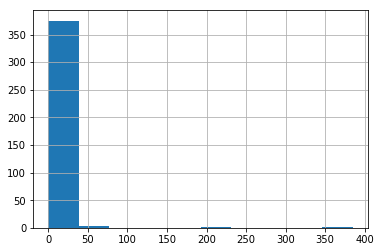

In [10]:
st.absences.hist()
st.absences.describe()

Как видим, в данных скорее всего есть выбросы, т.к. большее количество пропущенных занятий распределено между 0 и 8. Проверим:

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


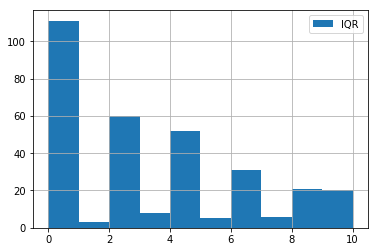

In [11]:
perc25 = st.absences.quantile(0.25)
perc75 = st.absences.quantile(0.75)
IQR = perc75 - perc25
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                             l=perc75 + 1.5*IQR))

st.absences.loc[st.absences.between(perc25 - 1.5*IQR,
                                    perc75 + 1.5*IQR)].hist(bins=10,
                                                            range=(0, 10),
                                                            label='IQR')

plt.legend()

Отфильтруем данные:

In [12]:
st = st.loc[st.absences.between(perc25 - 1.5*IQR,
                                perc75 + 1.5*IQR)]

Наконец, рассмотрим столбец 'score':

count    359.000000
mean      52.005571
std       23.007528
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

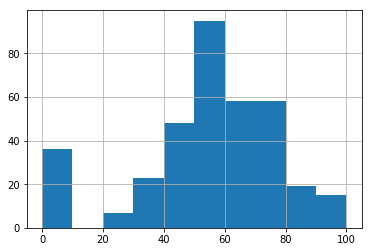

In [13]:
st.score.hist()
st.score.describe()

Как видим, используется 100-бальная система оценки. 75 % данных в столбце находится ниже 70 баллов. Выбросов не наблюдается. Но на всякий случай проверим:

In [14]:
perc25 = st.score.quantile(0.25)
perc75 = st.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                             l=perc75 + 1.5*IQR))

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 8.0,  Границы выбросов: [28.0, 82.0].


Как видим, границы выбросов меньше минимума и больше максимума значений в столбце 'score', соответственно, выбросов нет.

## Преобразование данных 
Как видим, в данных есть пропуски, в 27 столбцах из 30. В столбце с предсказываемой величиной score пропуски следует удалить, чтобы не вносить "шум" в будущую модель.

In [15]:
get_value_counts('score')

,score
50.0,53
55.0,42
0.0,36
75.0,31
65.0,30
60.0,28
70.0,27
40.0,25
45.0,23
80.0,16


In [16]:
st.dropna(subset=['score'], inplace=True)

In [17]:
get_value_counts('score')

,score
50.0,53
55.0,42
0.0,36
75.0,31
65.0,30
60.0,28
70.0,27
40.0,25
45.0,23
80.0,16


In [18]:
st.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               359 non-null    object 
 1   sex                  359 non-null    object 
 2   age                  359 non-null    int64  
 3   address              345 non-null    object 
 4   famsize              337 non-null    object 
 5   Pstatus              323 non-null    object 
 6   Medu                 356 non-null    float64
 7   Fedu                 336 non-null    float64
 8   Mjob                 343 non-null    object 
 9   Fjob                 325 non-null    object 
 10  reason               342 non-null    object 
 11  guardian             329 non-null    object 
 12  traveltime           331 non-null    float64
 13  studytime            354 non-null    float64
 14  failures             340 non-null    float64
 15  schoolsup            350 non-null    obj

Оценим количество пропусков в других столбцах в процентном соотношении:

In [19]:
def get_value_counts_percent(column):
    df = pd.DataFrame(st.loc[:, column].value_counts(
        dropna=False, normalize=True))
    display(df)

In [20]:
all_col = st.columns.to_list()
for c in all_col:
    get_value_counts_percent(c)

,school
GP,0.880223
MS,0.119777


,sex
F,0.518106
M,0.481894


,age
16,0.270195
17,0.245125
15,0.217270
18,0.206128
19,0.050139
20,0.005571
22,0.002786
21,0.002786


,address
U,0.743733
R,0.217270
NaN,0.038997


,famsize
GT3,0.662953
LE3,0.275766
NaN,0.061281


,Pstatus
T,0.810585
NaN,0.100279
A,0.089136


,Medu
4.0,0.337047
2.0,0.253482
3.0,0.245125
1.0,0.147632
0.0,0.008357
NaN,0.008357


,Fedu
2.0,0.270195
3.0,0.236769
4.0,0.220056
1.0,0.203343
NaN,0.064067
0.0,0.005571


,Mjob
other,0.328691
services,0.239554
at_home,0.153203
teacher,0.144847
health,0.089136
NaN,0.044568


,Fjob
other,0.504178
services,0.247911
NaN,0.094708
teacher,0.069638
at_home,0.044568
health,0.038997


,reason
course,0.353760
reputation,0.256267
home,0.253482
other,0.089136
NaN,0.047354


,guardian
mother,0.629526
father,0.228412
NaN,0.083565
other,0.058496


,traveltime
1.0,0.612813
2.0,0.233983
NaN,0.077994
3.0,0.055710
4.0,0.019499


,studytime
2.0,0.484680
1.0,0.264624
3.0,0.161560
4.0,0.075209
NaN,0.013928


,failures
0.0,0.760446
1.0,0.116992
NaN,0.052925
3.0,0.036212
2.0,0.033426


,schoolsup
no,0.849582
yes,0.125348
NaN,0.025070


,famsup
yes,0.557103
no,0.348189
NaN,0.094708


,paid
no,0.515320
yes,0.381616
NaN,0.103064


,activities
yes,0.504178
no,0.456825
NaN,0.038997


,nursery
yes,0.763231
no,0.194986
NaN,0.041783


,"studytime, granular"
-6.0,0.484680
-3.0,0.264624
-9.0,0.161560
-12.0,0.075209
NaN,0.013928


,higher
yes,0.905292
NaN,0.050139
no,0.044568


,internet
yes,0.760446
no,0.150418
NaN,0.089136


,romantic
no,0.610028
yes,0.306407
NaN,0.083565


,famrel
4.0,0.454039
5.0,0.256267
3.0,0.155989
NaN,0.072423
2.0,0.041783
1.0,0.019499


,freetime
3.0,0.398329
4.0,0.289694
2.0,0.153203
5.0,0.097493
1.0,0.041783
NaN,0.019499


,goout
3.0,0.328691
2.0,0.259053
4.0,0.206128
5.0,0.128134
1.0,0.058496
NaN,0.019499


,health
5.0,0.356546
3.0,0.228412
4.0,0.150418
1.0,0.114206
2.0,0.108635
NaN,0.041783


,absences
0.0,0.306407
2.0,0.167131
4.0,0.142061
6.0,0.083565
8.0,0.055710
10.0,0.047354
12.0,0.033426
14.0,0.030641
3.0,0.019499
16.0,0.019499


,score
50.0,0.147632
55.0,0.116992
0.0,0.100279
75.0,0.086351
65.0,0.083565
60.0,0.077994
70.0,0.075209
40.0,0.069638
45.0,0.064067
80.0,0.044568


Как видим, пропусков в столбцах не более 10,3% (в столбце 'paid'). Оставим их как есть, так как их не так много. Заменять пропуски на меры средней величины не имеет большого смысла на данном этапе, так как не знаем, какая будет использована модель для предсказания.

## Корреляционный анализ

Выясним, какие столбцы корррелируют с баллами по математике. Корреляции рассматриваем для числовых столбцов. В нашем случае это столбцы 'age'

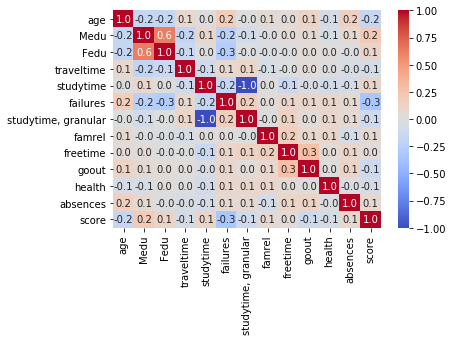

In [21]:
correlation = st.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.1f')

Как видим, столбцы 'studytime' и 'studytime, granular' имеют отрицательный коэффициент корреляции -1. Следовательно для дальнейшей работы можно оставить только один столбец. Уберем столбец, у которого нет описания, 'studytime, granular'.

In [22]:
st.drop(['studytime, granular'], inplace=True, axis=1)

Остальные указанные переменные слабо скоррелированы с баллами по математике, но тем не менее, оставим их для рассмотрения все, кроме 'freetime', так как изменения это переменной никак не влияют на изменение целевой (коэффициент корреляции нулевой).
Итого из числовых переменных оставляем:
- age
- Medu
- Fedu
- traveltime
- studytime
- failures
- famrel
- goout
- health
- absences

## Анализ номинативных переменных 

Номинативные переменные для рассмотрения:
- school
- sex 
- address
- famsize 
- Pstatus 
- Mjob
- Fjob
- reason
- guardian
- schoolsup
- famsup
- paid
- activities
- nursery 
- higher
- internet
- romantic

In [23]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=st.loc[st.loc[:, column].isin(
                    st.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

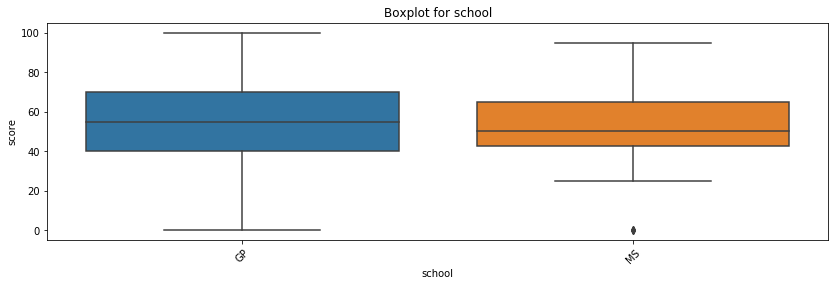

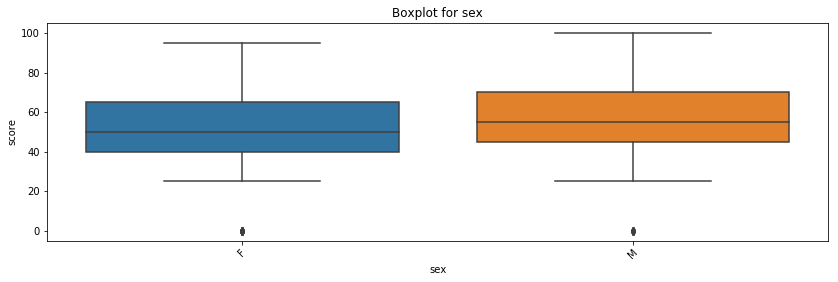

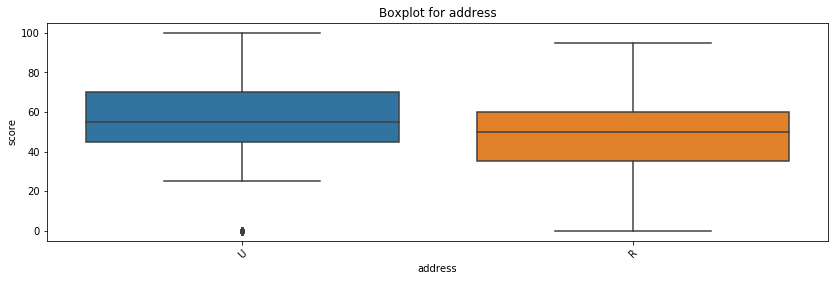

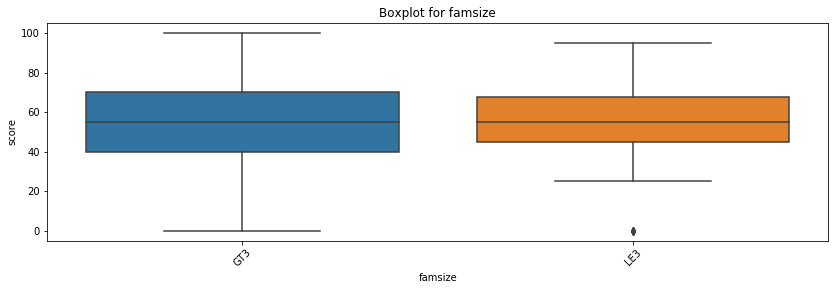

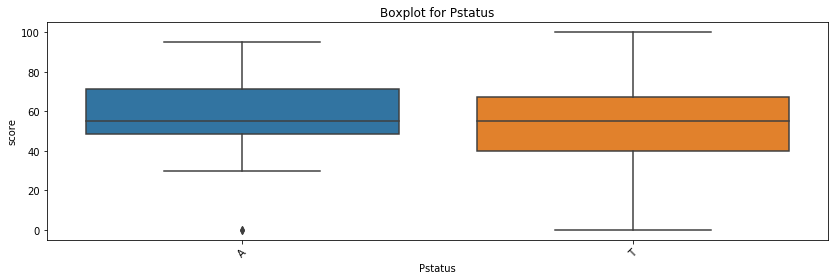

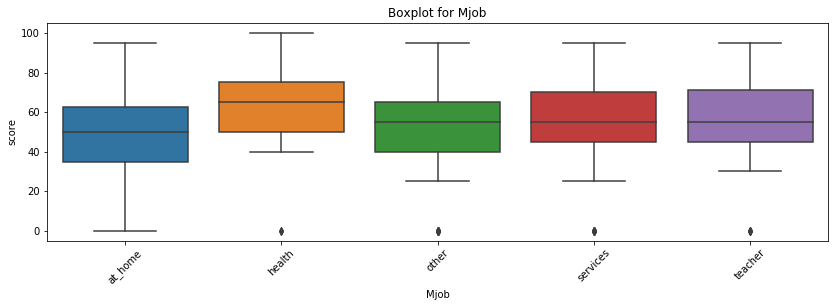

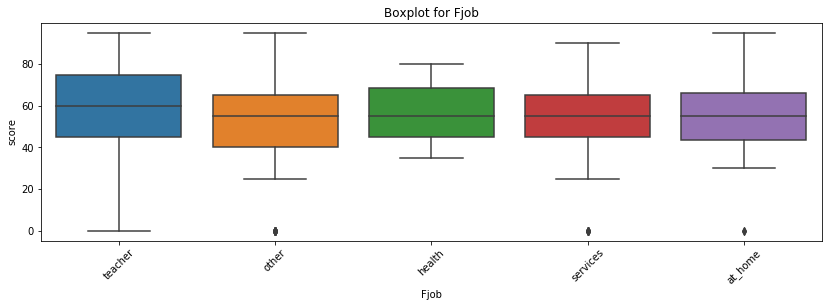

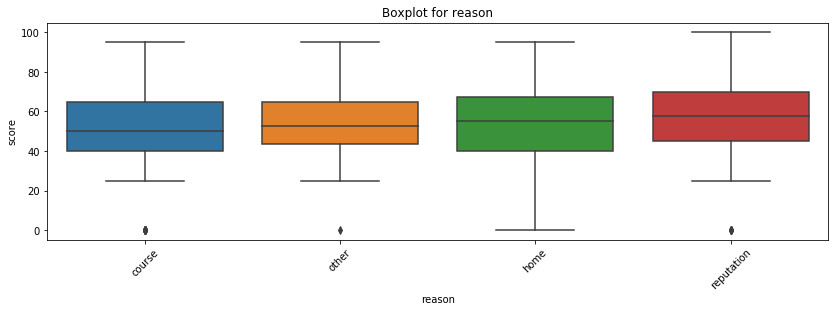

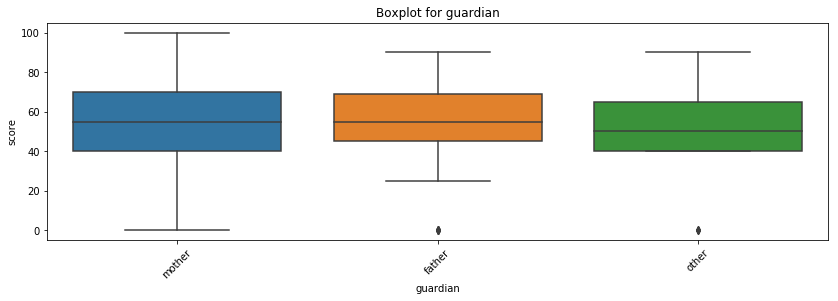

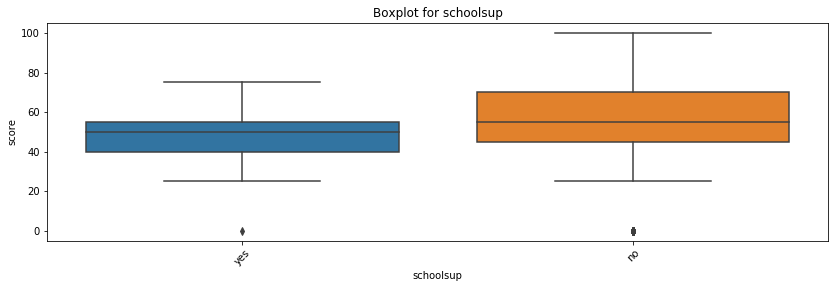

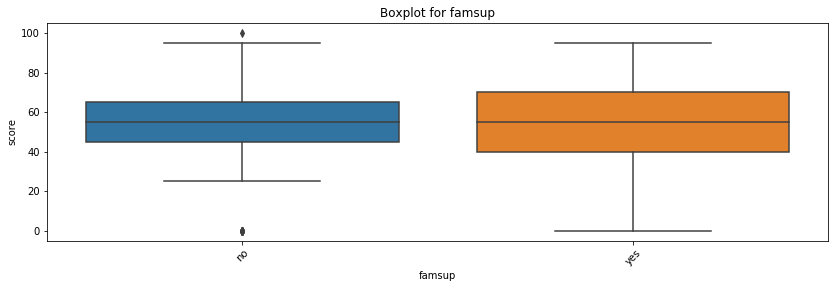

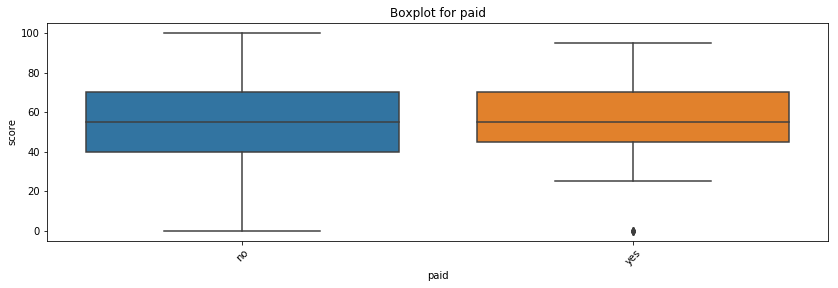

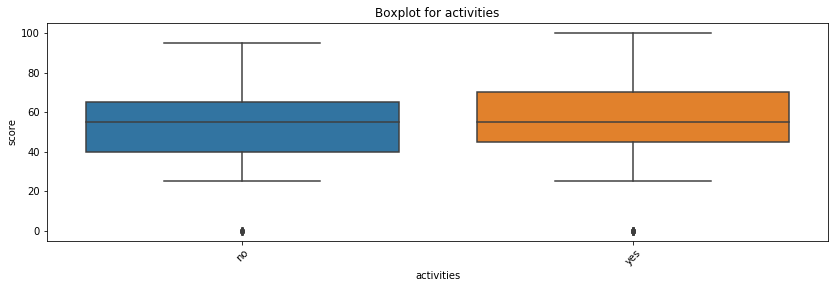

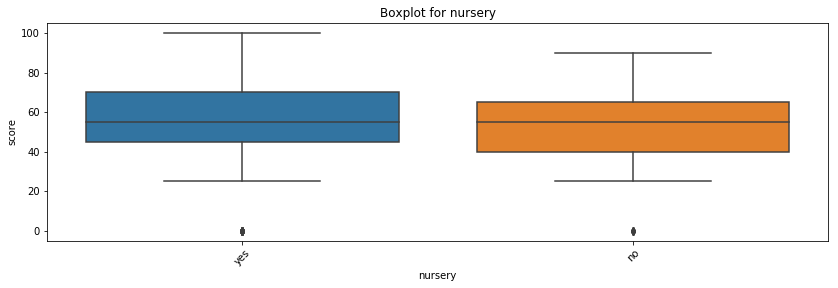

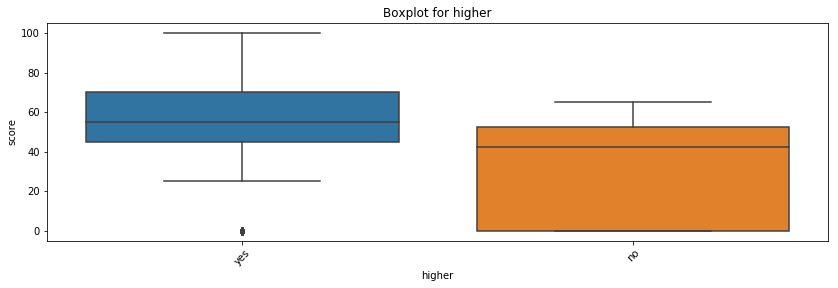

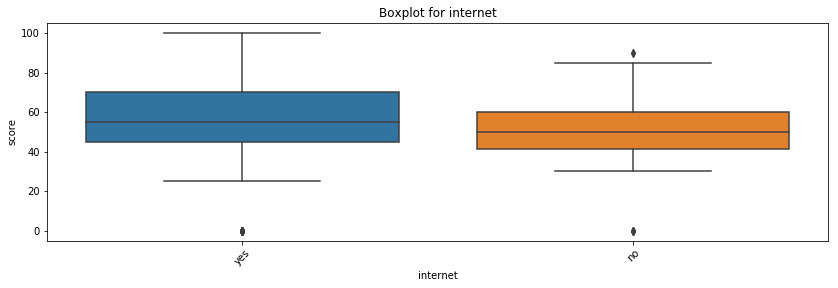

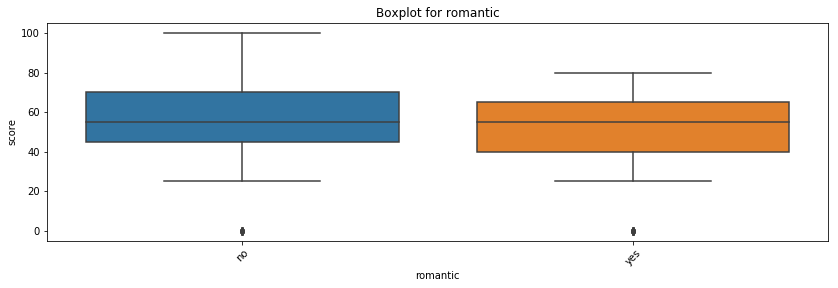

In [24]:
nom_var = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
           'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
           'activities', 'nursery', 'higher', 'internet', 'romantic']
for col in nom_var:
    get_boxplot(col)

Судя по графикам, все параменты могут влиять на баллы по математике. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов по математике по различным параметрам не различимы:

In [25]:
def get_stat_dif(column):
    cols = st.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(st.loc[st.loc[:, column] == comb[0], 'score'],
                     st.loc[st.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [26]:
for col in nom_var:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Получается, что серьезно отличаются 6 параметров:
- sex
- address
- Mjob
- paid
- higher
- romantic

Итого в датасете для дальнейшего обучения модели оставляем следующие столбцы:
- age
- Medu
- Fedu
- traveltime
- studytime
- failures
- famrel
- goout
- health
- absences
- sex
- address
- Mjob
- paid
- higher
- romantic

In [27]:
st_for_model = st.loc[:, ['age', 'Medu', 'Fedu', 'traveltime',
                          'studytime', 'failures', 'famrel', 'goout',
                          'health', 'absences', 'sex', 'address',
                          'Mjob', 'paid', 'higher', 'romantic']]
st_for_model.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,health,absences,sex,address,Mjob,paid,higher,romantic
0,18,4.0,4.0,2.0,2.0,0.0,4.0,4.0,3.0,6.0,F,U,at_home,no,yes,no
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,4.0,F,U,at_home,no,yes,no
2,15,1.0,1.0,1.0,2.0,3.0,4.0,2.0,3.0,10.0,F,U,at_home,NaN,yes,NaN
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,5.0,2.0,F,U,health,yes,yes,yes
4,16,3.0,3.0,1.0,2.0,0.0,4.0,2.0,5.0,4.0,F,U,other,yes,yes,no


# Выводы
В результате EDA для анализа влияния параметров учеников на их оценки по математике были получены следущие выводы:
- в данных достаточно мало пустых значений.
- выбросы найдены только в столбце absences и найдено всего два значения во всем датасете, заполненных скорее всего ошибочно,  что говорит о том, что данные достаточно чистые.
- самая сильная (относительно) корреляция с баллами по математике наблюдается с количеством внеучебных неудач, причем она отрицательная, т.е. чем меньше неудач, тем выше баллы.
- самые важные параметры, которые предлагается использовать в дальнейшем для построения модели:
    - age
    - Medu
    - Fedu
    - traveltime
    - studytime
    - failures
    - famrel
    - goout
    - health
    - absences
    - sex
    - address
    - Mjob
    - paid
    - higher
    - romantic